In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import networkx as nx

from neuprint import Client

from config import conf
from dataset_utils import fetch_adjacency, fetch_rois_from_metadata, fetch_rois_from_df, fetch_primary_roi_datasets
from basic_metrics import indegree_mean,outdegree_mean

from fh import flow_hierarchy
from utils import conn2adj
from config import conf


<h1>primary_rois</h1>

In [5]:
c = Client(conf.neuprint_URL, conf.dataset_version)


In [ ]:
empty_rois = fetch_primary_roi_datasets(client=c)

In [6]:
_, primary_rois, _, toplevel_rois = fetch_rois_from_metadata(client=c)


In [39]:
results = pd.DataFrame(data=primary_rois,columns=['primary_roi'])

#basic/local metrics
results = pd.concat([results,pd.Series([],name='number_neurons',dtype=np.int)],axis=1)
results = pd.concat([results,pd.Series([],name='number_synapses',dtype=np.int)],axis=1)
results = pd.concat([results,pd.Series([],name='indegree_mean',dtype=np.float)],axis=1)
results = pd.concat([results,pd.Series([],name='outdegree_mean',dtype=np.float)],axis=1)

# results = pd.concat([results,pd.Series([],name='katz_centrality',dtype=np.float)],axis=1)
# results = pd.concat([results,pd.Series([],name='',dtype=np.float)],axis=1)

#global metrics
results = pd.concat([results,pd.Series([],name='recurrence',dtype=np.float)],axis=1)
results = pd.concat([results,pd.Series([],name='flow_hierarchy',dtype=np.float)],axis=1)


In [40]:
#load flow_hierarchy
for i,rec in results.iterrows():
    try:
        roi = rec['primary_roi']
        #print(roi)
        path = os.path.join(conf.results_dir,'flow_hierarchy','fh_roi='+roi+'.txt')
        if os.path.exists(path):
            #print(roi,'result found')
            with open(path,'r') as f:
                results.loc[results['primary_roi']==roi,'flow_hierarchy'] = float(f.read())
        #else:
            #print(roi,'result NOT found')
    except MemoryError:
        print('memory error')
        continue


#load basic quantities
for i,rec in results.iterrows():
    try:
        roi = rec['primary_roi']
        #print(roi)
        #path = os.path.join(conf.results_dir,'flow_hierarchy','fh_roi='+roi+'.txt')
    #         if os.path.exists(path):
    #             with open(path,'r') as f:
    #                 print('result found')
        path = os.path.join(conf.datasets_dir,'noncropped_traced_'+roi)
        if os.path.exists(path):
            n,conn = fetch_adjacency(adjpath=path)
            results.loc[results['primary_roi']==roi,'number_neurons'] = int(n.shape[0])
            results.loc[results['primary_roi']==roi,'number_synapses'] = int(conn.shape[0])
            
#             n,adj = conn2adj(conn)
#             results.loc[results['primary_roi']==roi,'indegree_mean'] = indegree_mean(adj)
#             results.loc[results['primary_roi']==roi,'outdegree_mean'] = outdegree_mean(adj)

    except MemoryError:
        print('memory error')
        continue

In [41]:
results = results.sort_values(by='number_synapses')

In [ ]:

results.to_csv(os.path.join(conf.results_dir,'results.csv'))

<h3>primary_rois / basic quantities plots</h3>

In [42]:
results

,primary_roi,number_neurons,number_synapses,indegree_mean,outdegree_mean,recurrence,flow_hierarchy
61,PRW,0.0,0.0,NaN,NaN,NaN,NaN
8,a'L(L),19.0,21.0,NaN,NaN,NaN,0.938053
10,aL(L),15.0,53.0,NaN,NaN,NaN,0.886836
0,ME(R),71.0,97.0,NaN,NaN,NaN,0.895833
59,FLA(R),127.0,240.0,NaN,NaN,NaN,0.771505
48,AL(L),119.0,520.0,NaN,NaN,NaN,0.816083
60,CAN(R),274.0,598.0,NaN,NaN,NaN,0.825378
52,EPA(L),313.0,803.0,NaN,NaN,NaN,0.680288
24,BU(L),279.0,1094.0,NaN,NaN,NaN,0.772714
19,AB(L),96.0,1218.0,NaN,NaN,NaN,NaN


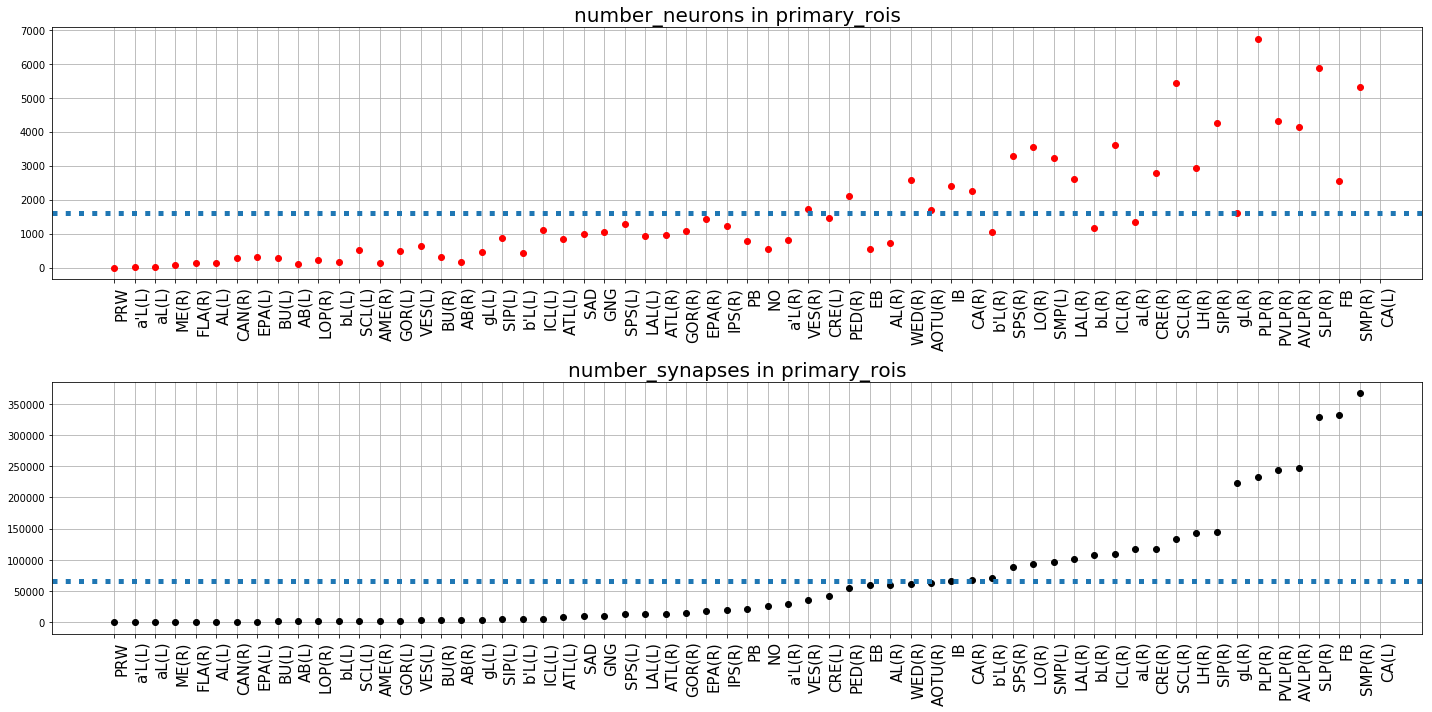

In [43]:
#plot basic quantities

fig,axs = plt.subplots(nrows=2,ncols=1,figsize=(20,10))

cols = ['number_neurons','number_synapses','indegree_mean','outdegree_mean']
styles = ['ro','ko']
for i,ax,col in zip(range(len(axs)),axs,cols):
    #t = rois[plot_list].to_numpy()
    #plt.imshow(t,cmap='gray')
    ax.plot(results[col].values,styles[i])

    ax.grid(True)
    ax.axhline(results[col].mean(),linestyle=':',linewidth=5)
    # for i in range(len(rois['combined_rois'])):
    #     ax.axhline(float(i)+0.5, linestyle=':', color='k',linewidth=1)
    # for i in range(5):
    #     ax.axvline(float(i)+0.5, linestyle=':', color='k',linewidth=1)
    # ax.set_aspect(1/5)
    ax.set_ylabel('',fontsize=15)
    ax.set_title(col+' in primary_rois',fontsize=20)
    ax.set_xticks([i for i in range(len(primary_rois))])
    ax.set_xticklabels(results['primary_roi'],fontsize=15)
    

    
    # ax.set_xticklabels([0]+plot_list,fontsize=20)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor")

plt.tight_layout()
plt.show()

<h3>primary_rois / flow_hierarchy plots</h3>

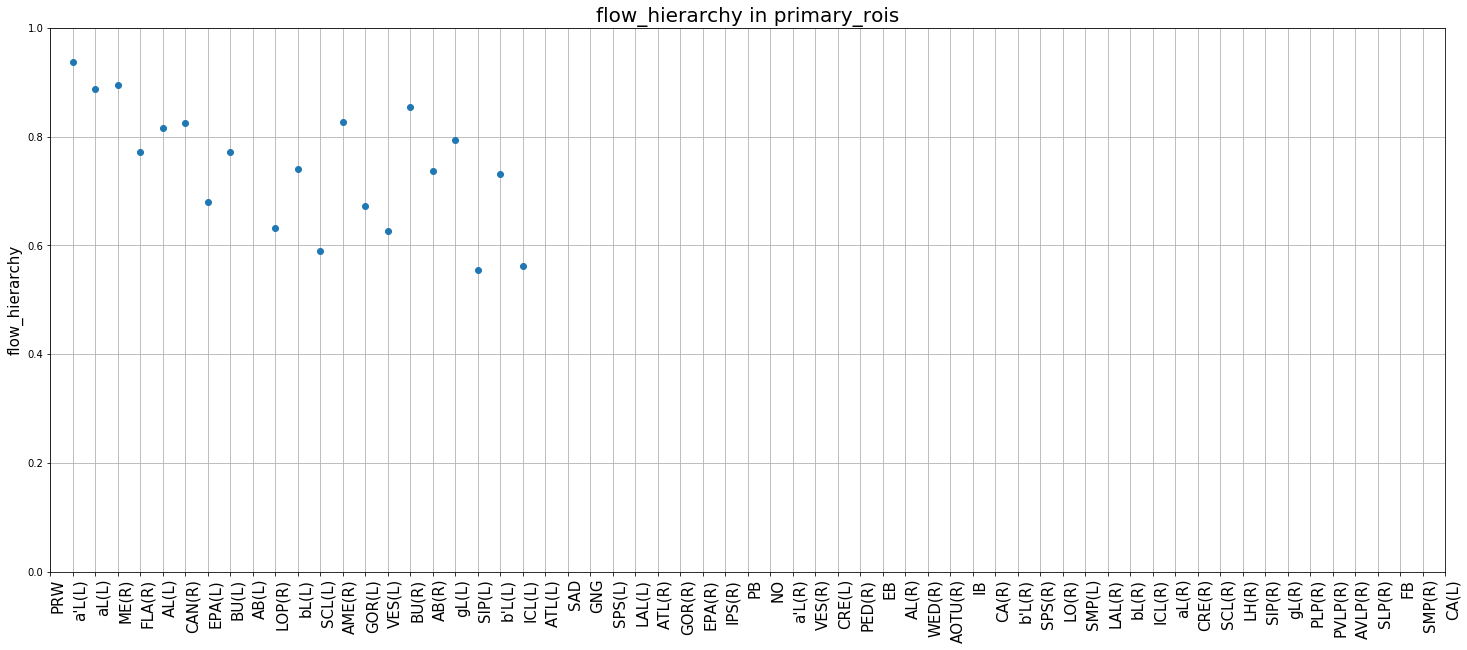

In [45]:
#plot flow_hierarchy

#plot_list = ['all_rois','df_rois','primary_rois','toplevel_rois','nonhierarchy_rois']
fig = plt.figure(figsize=(25,10))
#t = rois[plot_list].to_numpy()
#plt.imshow(t,cmap='gray')
plt.plot(results['flow_hierarchy'].values,'o')
ax = fig._get_axes()[0]
ax.grid(b=True)
# for i in range(len(rois['combined_rois'])):
#     ax.axhline(float(i)+0.5, linestyle=':', color='k',linewidth=1)
# for i in range(5):
#     ax.axvline(float(i)+0.5, linestyle=':', color='k',linewidth=1)
# ax.set_aspect(1/5)
ax.set_ylabel('flow_hierarchy',fontsize=15)
ax.set_title('flow_hierarchy in primary_rois',fontsize=20)
ax.set_xticks([i for i in range(len(primary_rois))])
ax.set_xticklabels(results['primary_roi'],fontsize=15)
ax.set_ylim(0,1)
# ax.set_xticklabels([0]+plot_list,fontsize=20)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor")

plt.show()


<h3>primary_rois / neurons vs synapses</h3>

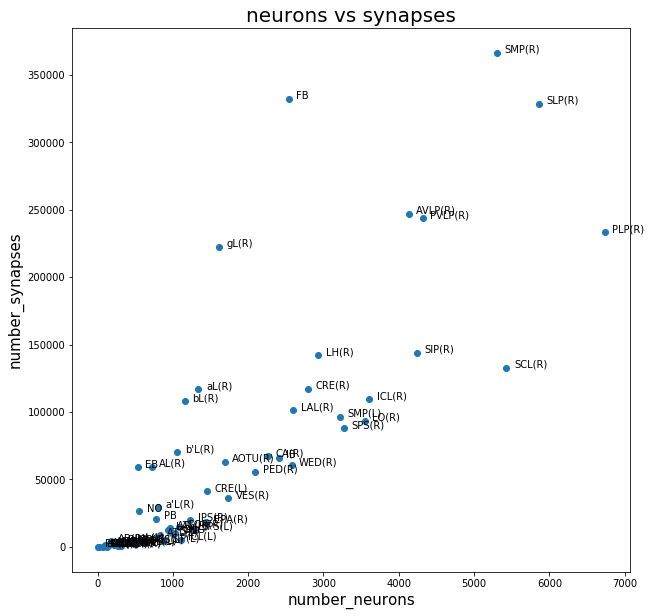

In [103]:
res = results.dropna().reset_index()

fig,axs = plt.subplots(figsize=(10,10))
plt.scatter(res['number_neurons'],res['number_synapses'])
ax = axs
z = res['number_neurons'].values
y = res['number_synapses'].values
ax.set_xlabel('number_neurons',fontsize=15)
ax.set_ylabel('number_synapses',fontsize=15)
ax.set_title('neurons vs synapses',fontsize=20)
for i, rec in res.iterrows():
    ax.annotate(rec['primary_roi'], (z[i]+100, y[i]+100))
plt.show()
#ax = fig._get_axes()[0]
#ax.set_aspect(1/50)

<h1>toplevel_rois</h1>

In [125]:
c = Client(conf.neuprint_URL, conf.dataset_version)


In [126]:
_, primary_rois, _, toplevel_rois = fetch_rois_from_metadata(client=c)


<h1>CX study</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import networkx as nx

from neuprint import Client, NeuronCriteria, fetch_adjacencies, fetch_roi_hierarchy, fetch_meta

from config import conf
from dataset_utils import fetch_adjacency, fetch_CX_datasets
from basic_metrics import indegree_mean,outdegree_mean

from fh.flow_hierarchy import hpy
from utils import conn2adj
from config import conf


In [2]:
c = Client(conf.neuprint_URL, conf.dataset_version)


In [4]:
_ = fetch_CX_datasets(client=c,include_nonprimary=True)

dataset in adjpath= datasets/noncropped_traced_CX
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_PB.NO.FB.EB.AB(L).AB(R)
dataset already downloaded


In [6]:
neur_CX_split,conn_CX_split = {}, {}
CX_rois = ['PB','NO','FB','EB','AB(L)','AB(R)']
for roi in CX_rois:
    n,conn = fetch_adjacency(adjpath='datasets/noncropped_traced_'+roi) 
    neur_CX_split[roi],conn_CX_split[roi] = n,conn
    
neur_CX_parts,conn_CX_parts = fetch_adjacency(adjpath='datasets/noncropped_traced_PB.NO.FB.EB.AB(L).AB(R)')
neur_CX,conn_CX = fetch_adjacency(adjpath='datasets/noncropped_traced_CX')

dataset in adjpath= datasets/noncropped_traced_PB
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_NO
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_FB
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_EB
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_AB(L)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_AB(R)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_PB.NO.FB.EB.AB(L).AB(R)
dataset already downloaded
dataset in adjpath= datasets/noncropped_traced_CX
dataset already downloaded


In [10]:
for key in conn_CX_split.keys():
    print(key,conn_CX_split[key].shape[0])

PB 21026
NO 26287
FB 332510
EB 58908
AB(L) 1218
AB(R) 4016


In [13]:
CX_roistest = ['PB']
#hpy = lambda x: np.random.randn()
h_results = {'h':[],'h_randwire':[],'h_randweight':[]}
for roi in CX_roistest:
    print(roi)
    n,conn = fetch_adjacency(adjpath='datasets/noncropped_traced_'+roi)
    nmap,adj = conn2adj(conn)
    h_results['h'] += [hpy(adj)]
    
    N = adj.shape[0]
    perm = np.random.permutation(N)
    h_results['h_randwire'] += [hpy(adj[:, perm])]
    
    nonz = np.nonzero(adj)
    weights = adj[nonz]
    np.random.shuffle(weights)
    adj[nonz] = weights
    h_results['h_randweight'] += [hpy(adj)]
    

PB
dataset in adjpath= datasets/noncropped_traced_PB
dataset already downloaded


{'h': [0.7719495829849233,
  0.21109113435088464,
  -0.7513748160910735,
  2.179994920668987,
  0.22218988750631607,
  0.1907756030268632],
 'h_randwire': [0.26263195199323697,
  -1.5929079187009827,
  -1.800274244704734,
  0.5699159851155416,
  -0.45197221176813546,
  0.8847199657543865],
 'h_randweight': [-0.10104703335313737,
  -0.16257552441463252,
  0.6540532815489787,
  -0.6995712408069853,
  0.9742960542064604,
  -0.25119930291997633]}

<h1>other</h1>

In [8]:
#establish relation roi -> main_roi

from neuprint import Client,fetch_roi_hierarchy

c = Client('neuprint.janelia.org', 'hemibrain:v1.1')
g = fetch_roi_hierarchy(mark_primary=False,include_subprimary=True,format='nx')

def find_main_roi(roi):
    pred = list(g.predecessors(roi))[0]
    if pred!='hemibrain':
        return find_main_roi(pred)
    else:
        return roi

df['main_roi'] = df['roi'].apply(func=find_main_roi)

NameError: name 'df' is not defined

In [7]:
A0 = 1*(A>0)

In [128]:
a = np.array([[0,1],[2,3]])

In [129]:
np.sum(a,axis=1)

array([1, 5])

In [130]:
a

array([[0, 1],
       [2, 3]])

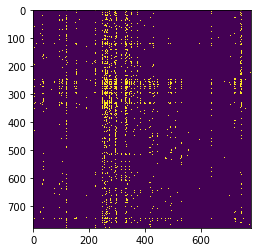

In [8]:
plt.imshow(A0)